# Testing alternative parameterization for effective population size in NAT


I'll test the followig models:

1. Constant size
2. Two epochs.
3. Expansion.
4. Three epochs.

In addition to the deme's population size parameters. I will also infer the split branch from CHB, all other parameters will be fixed and constant.


In [2]:
import moments
import demes
import demesdraw
import matplotlib.pyplot as plt
import pickle
import gzip
from IPython.display import Markdown as md
import warnings

# Function for printing syntax-highlighted YAML demes models
# If there is a better way to do this, tell me!!
def print_model(file_path):
    with open(file_path) as f:
        lines = f.read()
    return md("```yaml\n" + lines + "```")

warnings.filterwarnings('ignore')

# Parametrizations to test

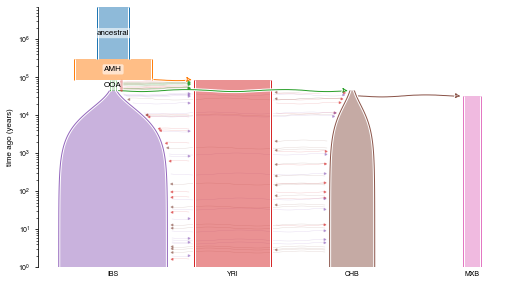

In [3]:
# Constant size
m1 = demes.load('./model-parametrizations/01ConstantSize.yml')
demesdraw.tubes(m1, log_time=True);

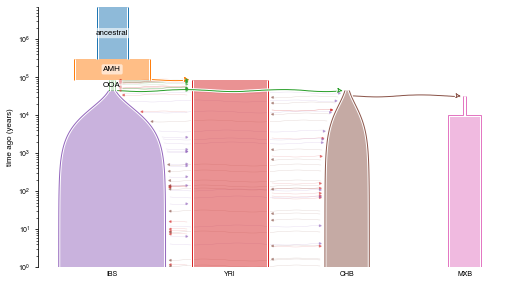

In [4]:
# two epochs
m2 = demes.load('./model-parametrizations/02TwoEpochs.yml')
demesdraw.tubes(m2, log_time=True);

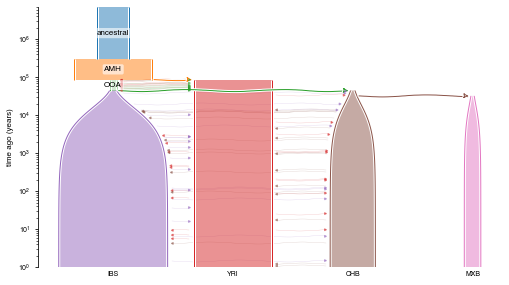

In [5]:
# Exponential growth
m3 = demes.load('./model-parametrizations/03ExponentialChange.yml')
demesdraw.tubes(m3, log_time=True);

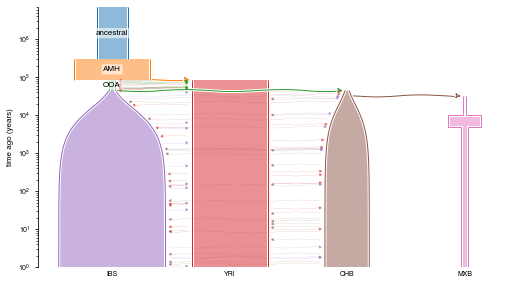

In [6]:
# 3 epochs
m4 = demes.load('./model-parametrizations/04ThreeEpochs.yml')
demesdraw.tubes(m4, log_time=True);